## Getting SIFT keypoints 

In [1]:
from functions import *

### Initial image

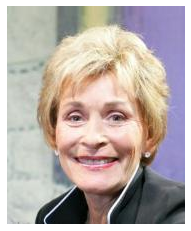

In [3]:
img = cv2.cvtColor(cv2.imread('202547.jpg'), cv2.COLOR_BGR2RGB)
plot_img(img)

### Gray image

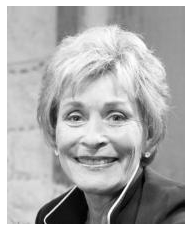

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plot_img(img_gray, cmap='gray')

### Gaussian Blur defferences

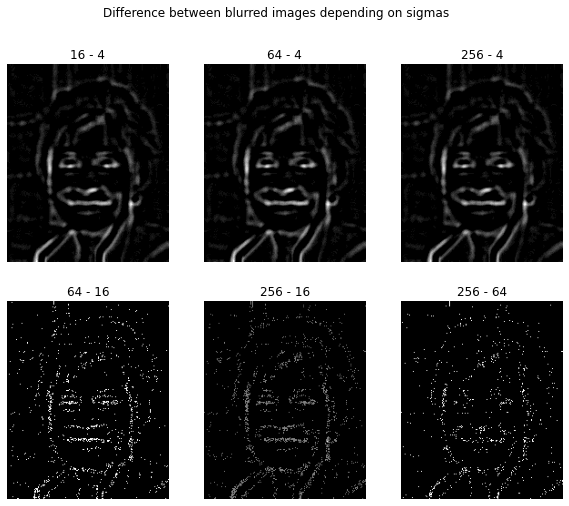

In [116]:
blur = 11
i = -1
nrows = 2
ncols = 3

diff_blured_imgs = []
list_sigmas = []

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))
for sigma1 in [4, 16, 64, 256]:
    transform1 = A.GaussianBlur(blur_limit=(blur, blur), sigma_limit=(sigma1, sigma1), p=1)
    img1 = np.array(transform1(image=img_gray)["image"], dtype=np.uint8)
    
    for sigma2 in [16, 64, 256]:
        if sigma1 < sigma2:
            i += 1
            list_sigmas += [f'{sigma2} - {sigma1}']
            transform2 = A.GaussianBlur(blur_limit=(blur, blur), sigma_limit=(sigma2, sigma2), p=1)
            img2 = np.array(transform2(image=img_gray)["image"], dtype=np.uint8)
            diff_img = np.clip(img2.astype(int) - img1.astype(int), 0, 255).astype(np.uint8)
            diff_blured_imgs += [diff_img]
            ax[i // ncols, i % ncols].imshow(diff_img, cmap='gray')
            ax[i // ncols, i % ncols].axis('off')
            ax[i // ncols, i % ncols].title.set_text(f'{sigma2} - {sigma1}')
            
fig.suptitle('Difference between blurred images depending on sigmas');

### Detect and remove the edges

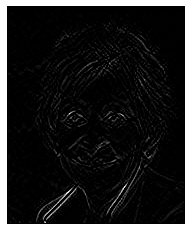

In [101]:
# Use Sobel operator to detect the edges

edge = cv2.Sobel(img_gray, cv2.CV_8U, 1, 1, ksize=1, scale=1)
plot_img(edge, cmap='gray')

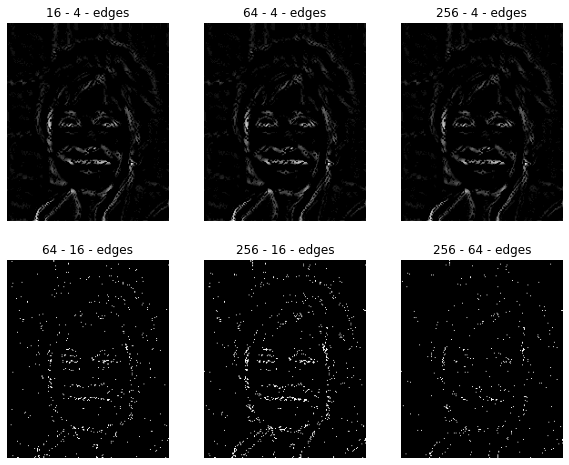

In [109]:
# delete found edges from images of previous step

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))
i = -1

for diff_img, sigmas in zip(diff_blured_imgs, list_sigmas):
    i += 1
    diff_img_not_edge = np.clip(diff_img.astype(int) - edge.astype(int), 0, 255).astype(np.uint8)
    ax[i // ncols, i % ncols].imshow(diff_img_not_edge, cmap='gray', )
    ax[i // ncols, i % ncols].axis('off')
    ax[i // ncols, i % ncols].title.set_text(f'{sigmas} - edges')